In [12]:
from numpy import linspace, arange, zeros
from control import c2d, tf
import matplotlib.pyplot as plt
import numpy as np
import cmath
import math
import control
import control.matlab
from sympy import *
#from lcapy import z, n

### Questao 1

In [2]:
T = 0.2

Gs = tf([1], [1, 2])

Gz = c2d(Gs, T)

print('Gz = \n', Gz)

Gz = 
 
  0.1648
----------
z - 0.6703

dt = 0.2



In [5]:
As = tf([1],[1,5])
print(As)
Bs = 5


  1
-----
s + 5



In [7]:
ABs = control.parallel(As,Bs)
print(ABs)


5 s + 26
--------
 s + 5



In [9]:
GHs = Gs * ABs
print(f'GHs = {GHs}')

GHz = c2d(GHs, T)
print(f'GHz = {GHz}')

GHs = 
   5 s + 26
--------------
s^2 + 7 s + 10

GHz = 
   0.837 z - 0.2952
----------------------
z^2 - 1.038 z + 0.2466

dt = 0.2



In [10]:
Fs = tf([5],[1, 4])

Fz = c2d(Fs, T)

print('Fz = \n', Fz)

Fz = 
 
  0.6883
----------
z - 0.4493

dt = 0.2



## Bloco das equacoes recursivas

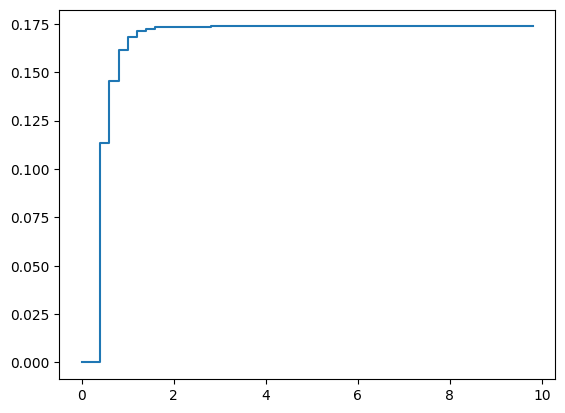

In [11]:
#Equacoes recursivas 

#G
#c[k] = 0.1648*e[k-1] + 0.6703*c[k-1]

#GH
#v[k] = 0.837*e[k-1] - 0.2952*e[k-2] + 1.038*v[k-1] - 0.2466*v[k-2]

#F
#x[k] =  0.6883*r[k-1] + 0.4493*x[k-1]

#e = x - v

kmax = 50

# Para entrada degrau unitario: np.ones(kmax)
# Para entrada rampa unitario: T*arange(0,kmax) 
t = T*arange(0,kmax)
r = np.ones(kmax)

c = np.zeros(kmax)
v = np.zeros(kmax)
x = np.zeros(kmax)
e = np.zeros(kmax)

k = 1

v[k] = 0.837*e[k-1] + 1.038*v[k-1] 
x[k] = 0.6883*r[k-1] + 0.4493*x[k-1]
e[k] = x[k] - v[k]
c[k] = 0.1648*e[k-1] + 0.6703*c[k-1]


for k in range(2, kmax):
    v[k] = 0.837*e[k-1] - 0.2952*e[k-2] + 1.038*v[k-1] - 0.2466*v[k-2]
    x[k] = 0.6883*r[k-1] + 0.4493*x[k-1]
    e[k] = x[k] - v[k]
    c[k] = 0.1648*e[k-1] + 0.6703*c[k-1]
    
    
    
# para mostrar por steps
plt.plot(t,c, ds='steps-post')

#para mostrar em tempo continuo
#plt.plot(t,c)


Calculo do erro em regime permanente

In [ ]:
0.837 z - 0.2952
----------------------
z^2 - 1.038 z + 0.2466

In [29]:
Fz

TransferFunction(array([0.68833879]), array([ 1.        , -0.44932896]), 0.2)

In [31]:
f = 0.6883/(z-0.4493)
f

0.6883/(z - 0.4493)

In [17]:
function

(0.837*z - 0.2952)/(z**2 - 1.038*z + 0.2466)

In [33]:
ess = limit(f/(1+function),z,1)
print(ess)

1025567/2951752


In [35]:
test = 1025567/2951752
print(test)

0.3474434844119696


In [15]:
z = Symbol('z')
function = (0.837*z - 0.2952) /(z**2 - 1.038*z + 0.2466)

error = 1/(1 + limit(function,z,1))
print(error)

149/536


In [53]:
K = GHz(1)
ess = Fz(1)/(1+K)
ess


(0.34722222222222215+0j)

In [ ]:
f = 

1 states have been removed from the model


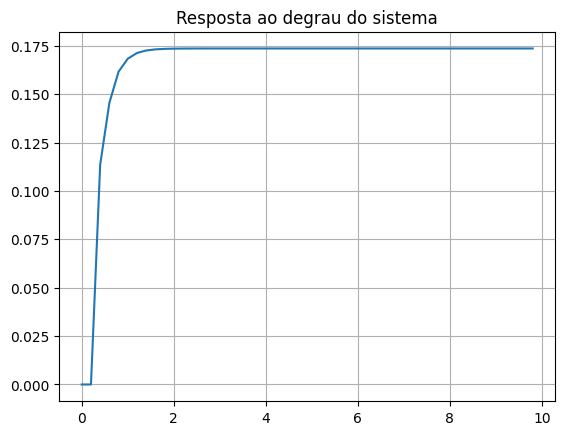

In [28]:
FTMF = control.minreal((Gz/(1+GHz))*Fz)
xf, yf = control.step_response(FTMF, t)
plt.title("Resposta ao degrau do sistema")
plt.grid()
plt.plot(xf,yf)

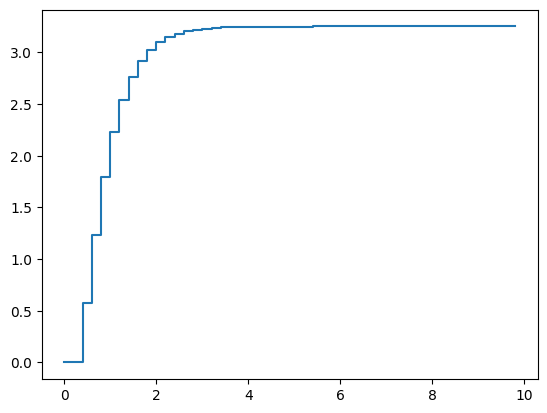

In [21]:
plt.plot(t,y, ds='steps-post')

In [16]:
149/536

0.27798507462686567

In [10]:
GHz

TransferFunction(array([ 0.57424927, -0.35808309]), array([ 1.        , -1.13533528,  0.13533528]), 0.5)

In [11]:
Fz

TransferFunction(array([2.5]), array([ 1., -1.]), 0.5)

In [12]:
FTMF = control.minreal(Fz*GHz)

0 states have been removed from the model


In [13]:
FTMF

TransferFunction(array([ 1.43562317, -0.89520772]), array([ 1.        , -2.13533528,  1.27067057, -0.13533528]), 0.5)

In [18]:
Rz = tf([1,0], [1, -1],T)

In [19]:
Rz

TransferFunction(array([1, 0]), array([ 1, -1]), 0.5)

In [20]:
cz = control.minreal(Rz*GHz)

0 states have been removed from the model


In [24]:
cz

TransferFunction(array([ 0.57424927, -0.35808309,  0.        ]), array([ 1.        , -2.13533528,  1.27067057, -0.13533528]), 0.5)

In [30]:
function = (0.5742*z**2 - 0.3581*z)/(z**3 - 2.135*z**2+1.271*z-0.1353)

In [36]:
result = function.partfrac()

In [ ]:
result

In [31]:
type(function)

lcapy.zexpr.ZDomainExpression

In [34]:
result = function(n,causal=True)

In [ ]:
result

No fim o calculo do erro não deu certo...pau no cu do Flábio

### Questao 2

In [41]:
#Parametros de entrada
T = 0.5

z_rect = 0.4 + 0.3*1j

print(f'Z na forma retangular: {z_rect}')

Z na forma retangular: (0.4+0.3j)


In [67]:
G1z = tf([0.2], [1,-0.6],T)
print(G1z)
Hz = tf([1,0], [1,-1],T)
print(Hz)
Gc = tf([1,-0.6], [1,-0.25],T)
print(Gc)


  0.2
-------
z - 0.6

dt = 0.5


  z
-----
z - 1

dt = 0.5


z - 0.6
--------
z - 0.25

dt = 0.5



In [68]:
FTMF = control.minreal((Gc*G1z)/(1+(Gc*G1z*Hz)))
FTMA = control.minreal(Gc*G1z*Hz)
print(FTMA)

3 states have been removed from the model
1 states have been removed from the model

       0.2 z
-------------------
z^2 - 1.25 z + 0.25

dt = 0.5



In [69]:
Kc = 1/np.abs(FTMA(z_rect))
print(Kc)

2.2500000000000018


In [70]:
# Resultados finais
print('Resultados finais: \n')
print(f'Kc = {Kc}')
print(f'Alpha = {alpha}')
print(f'Beta2 = {beta}')

Resultados finais: 

Kc = 2.2500000000000018
Alpha = -0.6
Beta2 = beta


In [71]:
zeta = (1+(cmath.log(np.abs(z_rect))/cmath.phase(z_rect))**(-2))**(-1/2)
print(zeta)

(0.7328649544863685-0j)


tendo o zeta podemos calcular o Wn facilmente (mas não foi feito LOL)

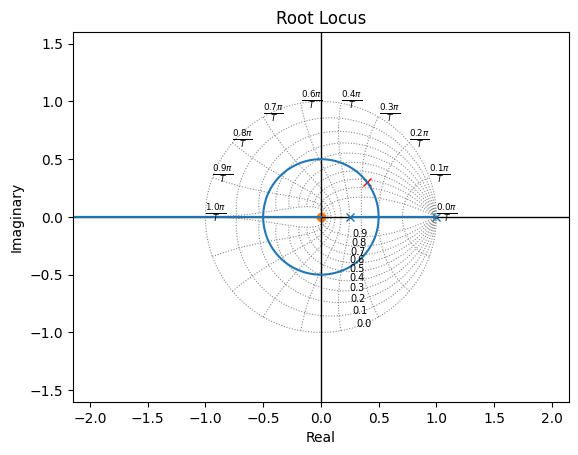

In [72]:
#Para calcular o lugar das raizes (rlocus) passamos na entrada a FTMA e o ganho Kc
control.root_locus(FTMA)
plt.plot(z_rect.real, z_rect.imag, 'xr')
plt.xlim(-1,1)
plt.ylim(-1.6,1.6)
plt.show()


In [73]:
FTMA.poles()

array([1.  +0.j, 0.25+0.j])

In [ ]:
G